# Statistical Modeling





## Let's talk about data types:

### There are several types of data:

##### Categorical Data
- Nominal 
- Ordinal

##### Numerical Data
- Discrete
- Continuous
- Interval
- Ratio



Why is important to know which data do you have

# ?


Because it is crucial to apply the apropiate statistical methods for a socalled _Exploratory Data Analysis (EDA) 

For those who date.............

More info about data type:
https://towardsdatascience.com/data-types-in-statistics-347e152e8bee

To practice some EDA, exercises can be found here: 
https://www.datacamp.com/courses/statistical-thinking-in-python-part-1/

### Numerical data: 
- Coninuous
- Discrete

Numerical and Discrete data can be easly mix but they are very different when we talk about statistical methods to apply

#### Discrete Data

Cannot be measure but can be counted. The data only can take certain values (the list o possible values may be fixed, from 0--inf.). They take on possible values that can be listed out.  


Examples:
Discrete data are RNAseq data 

#### Continuous Data

Those represent values that cannot be counted but they can be measured (use intervals on the real number line). 
For example, the exact amount of gas purchased at the pump for cars with 20-gallon tanks would be continuous data from 0 gallons to 20 gallons, represented by the interval [0, 20], inclusive.


Examples:
Continuous data are Microarray data

## Statistical Modeling And fitting data with Python


#### How many of us followed a statistical course, workshop or similar

###### Statistical modeling is the statistical model that your data can fit in.

Most statistic courses are focus in hypothesis tests:t-test, chi-square tests, analysis of variance, etc. Tests to determine whether groups/effects are "statistically significan". 

A more powerful aproach is to build statistical models to "estimate quantities of interest". We can use python to build statistical models and use them to extract estimates and associated measures of uncertainty.

For statistical modeling we need to know the distribution.

But......What is the distribution


* Is a function that discribes the relationship between observation in a samples space

* Is the function showing all the possible values of the data and how often they occur


Best:

* **Plain English:**  distribution is simply a collection of data, or scores, on a variables. Usually, these scores are arranged in order from smallest to largest and then they can be presented graphically.

_Once a distribution function is known, it can be used as a shorthand for describing and calculating related quantities (values), such as likelihoods of observations, and plotting the relationship between observations in the domain.

In plain English: Basically, you can get to know you data and how to analize it.


Distributions are often described in terms of their density or density functions.


* **Probability Density function:** calculates the probability of observing a given value.
* **Cumulative Density function:** calculates the probability of an observation equal or less than a value.

Ring the bell?

The Normal Distribution or Gaussian distribution:

Many data conform to well-known and well-understood mathematical functions, such as the Gaussian distribution. A function can fit the data with a modification of the parameters of the function, such as the mean and standard deviation in the case of the Gaussian.


The normal distribution is a continuous probability distribution characterized by a symmetric bell-shaped curve. A normal distribution is defined by its center (mean) and spread (standard deviation.). 
The bulk of the observations generated from a normal distribution lie near the mean, which lies at the exact center of the distribution: as a rule of thumb, about 68% of the data lies within 1 standard deviation of the mean, 95% lies within 2 standard deviations and 99.7% lies within 3 standard deviations.
The normal distribution is perhaps the most important distribution in all of statistics. It turns out that many real world phenomena, like IQ test scores and human heights, roughly follow a normal distribution, so it is often used to model random variables. Many common statistical tests assume distributions are normal.

Continuous data

In [6]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats  as stats

In [7]:
import random

prob_under_minus1 = stats.norm.cdf(x= -1,  
                                loc = 0,               
                                scale= 1)     

prob_over_1 = 1 - stats.norm.cdf(x= 1,  
                                loc = 0,               
                                scale= 1) 

between_prob = 1-(prob_under_minus1+prob_over_1)


Text(1.4, 0.03, '0.159')

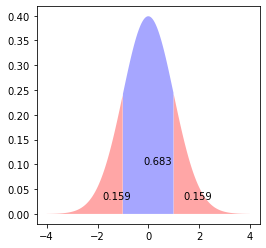

In [8]:
# Plot normal distribution areas*

plt.rcParams["figure.figsize"] = (4,4)
                                  
plt.fill_between(x=np.arange(-4,-1,0.01), 
                 y1= stats.norm.pdf(np.arange(-4,-1,0.01)) ,
                 facecolor='red',
                 alpha=0.35)

plt.fill_between(x=np.arange(1,4,0.01), 
                 y1= stats.norm.pdf(np.arange(1,4,0.01)) ,
                 facecolor='red',
                 alpha=0.35)

plt.fill_between(x=np.arange(-1,1,0.01), 
                 y1= stats.norm.pdf(np.arange(-1,1,0.01)) ,
                 facecolor='blue',
                 alpha=0.35)

plt.text(x=-1.8, y=0.03, s= round(prob_under_minus1,3))
plt.text(x=-0.2, y=0.1, s= round(between_prob,3))
plt.text(x=1.4, y=0.03, s= round(prob_over_1,3))


I am not going to explain more about normal distribution

I think is clear at this point that two most important things that we need to know are:  the **type of data** that we have and the **distribution** of our values or scores.

We are going to see examples of how to build a statistical model 

..............and of course python and its libraries are going to help a lot

In [9]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Set some Pandas options
pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', 20)
pd.set_option('display.max_rows', 25)

#### To work with statistical models, we need to know how to proceed.

There are several defined steps that we can follow

We need to know which data type we do have: 

If data is **discrete** (RNAseq, or numbers or ducks observed in a pond) for example, or **continuous** (microarray, pH measurement of a solution)

Once we know which type of data we are dealing with, the best way to continue is to make an histogram (bars, curve) to see or "show" the frequency of observations across a rage of bins

Estimation of the distribution
==========

A recurring statistical problem is finding estimates of the relevant parameters that correspond to the distribution that best represents our data.

In **parametric** inference, we specify *a priori* a suitable distribution, then choose the parameters that best fit the data.

* e.g. $\mu$ and $\sigma^2$ in the case of the normal distribution

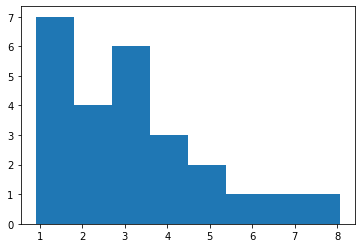

In [10]:
x = np.array([ 1.00201077,  1.58251956,  0.94515919,  6.48778002,  1.47764604,
        5.18847071,  4.21988095,  2.85971522,  3.40044437,  3.74907745,
        1.18065796,  3.74748775,  3.27328568,  3.19374927,  8.0726155 ,
        0.90326139,  2.34460034,  2.14199217,  3.27446744,  3.58872357,
        1.20611533,  2.16594393,  5.56610242,  4.66479977,  2.3573932 ])
_ = plt.hist(x, bins=8)

In [11]:
class PDF(object):
  def __init__(self, pdf, size=(200,200)):
    self.pdf = pdf
    self.size = size

  def _repr_html_(self):
    return '<iframe src={0} width={1[0]} height={1[1]}></iframe>'.format(self.pdf, self.size)

  def _repr_latex_(self):
    return r'\includegraphics[width=1.0\textwidth]{{{0}}}'.format(self.pdf)

![](Dist_examples.png)

We "select" the type of functional form/shape of out distribution. When we pick a shape/type of distribution, we are picking a "set of statistical methods behind to apply to our data" 

### Fitting data to probability distributions

We start with the problem of finding values for the parameters that provide the best fit between the model and the data, called point estimates. First, we need to define what we mean by ‘best fit’. There are two commonly used criteria:

So, we need to fit the candidate distribution to our data using:

**maximum Likehood**

**least square** method of moments


* **Method of moments** chooses the parameters so that the sample moments (typically the sample mean and variance) match the theoretical moments of our chosen distribution.
* **Maximum likelihood** chooses the parameters to maximize the likelihood, which measures how likely it is to observe our given sample.

### Discrete Random Variables

$$X = \{0,1\}$$

$$Y = \{\ldots,-2,-1,0,1,2,\ldots\}$$

**Probability Mass Function**: 

For discrete $X$,

$$Pr(X=x) = f(x|\theta)$$

![Discrete variable](http://upload.wikimedia.org/wikipedia/commons/1/16/Poisson_pmf.svg)

***e.g. Poisson distribution***

The Poisson distribution models unbounded counts:

<div style="font-size: 150%;">  
$$Pr(X=x)=\frac{e^{-\lambda}\lambda^x}{x!}$$
</div>

* $X=\{0,1,2,\ldots\}$
* $\lambda > 0$

$$E(X) = \text{Var}(X) = \lambda$$

### Continuous Random Variables

$$X \in [0,1]$$

$$Y \in (-\infty, \infty)$$

**Probability Density Function**: 

For continuous $X$,

$$Pr(x \le X \le x + dx) = f(x|\theta)dx \, \text{ as } \, dx \rightarrow 0$$

![Continuous variable](http://upload.wikimedia.org/wikipedia/commons/e/ec/Exponential_pdf.svg)

***e.g. normal distribution***

<div style="font-size: 150%;">  
$$f(x) = \frac{1}{\sqrt{2\pi\sigma^2}}\exp\left[-\frac{(x-\mu)^2}{2\sigma^2}\right]$$
</div>

* $X \in \mathbf{R}$
* $\mu \in \mathbf{R}$
* $\sigma>0$

$$\begin{align}E(X) &= \mu \cr
\text{Var}(X) &= \sigma^2 \end{align}$$

Ok, we selected a probability distribution that we think it fit out data.

Now, a good practice to do is **plot-line** the fitted distribution over our data histogram

We can use some test to be completely sure about the fitting. The test is called: goodness-of-fit test, it will hep us to determine the most appropiate distribution estimation mean and variance.

chi-square (discrete)

KS-test (continuos)


## Example: Nashville Precipitation

The dataset `nashville_precip.txt` contains [NOAA precipitation data for Nashville measured since 1871](http://bit.ly/nasvhville_precip_data). The gamma distribution is often a good fit to aggregated rainfall data, and will be our candidate distribution in this case.

In [15]:
# As usual, load data

precip = pd.read_csv("./data_course/nashville_precip.txt", index_col=0, na_values='NA', delim_whitespace=True)
precip.head()

       Jan   Feb   Mar    Apr   May   Jun   Jul   Aug   Sep   Oct   Nov   Dec
Year                                                                         
1871  2.76  4.58  5.01   4.13  3.30  2.98  1.58  2.36  0.95  1.31  2.13  1.65
1872  2.32  2.11  3.14   5.91  3.09  5.17  6.10  1.65  4.50  1.58  2.25  2.38
1873  2.96  7.14  4.11   3.59  6.31  4.20  4.63  2.36  1.81  4.28  4.36  5.94
1874  5.22  9.23  5.36  11.84  1.49  2.87  2.65  3.52  3.12  2.63  6.12  4.19
1875  6.15  3.06  8.14   4.22  1.73  5.63  8.12  1.60  3.79  1.25  5.46  4.30

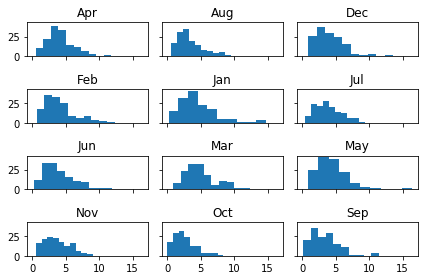

In [16]:
_ = precip.hist(sharex=True, sharey=True, grid=False)
plt.tight_layout()

The first step is recognizing what sort of distribution to fit our data to. A couple of observations:

1. The data are skewed, with a longer tail to the right than to the left
2. The data are positive-valued, since they are measuring rainfall
3. The data are continuous

There are a few possible choices, but one suitable alternative is the **gamma distribution**:

<div style="font-size: 150%;">  
    $$x \sim \text{Gamma}(\alpha, \beta) = \frac{\beta^{\alpha}x^{\alpha-1}e^{-\beta x}}{\Gamma(\alpha)}$$
</div>

![gamma](http://upload.wikimedia.org/wikipedia/commons/thumb/e/e6/Gamma_distribution_pdf.svg/500px-Gamma_distribution_pdf.svg.png)

The ***method of moments*** simply assigns the empirical mean and variance to their theoretical counterparts, so that we can solve for the parameters.

So, for the gamma distribution, the mean and variance are:

The ***method of moments*** simply assigns the empirical mean and variance to their theoretical counterparts, so that we can solve for the parameters.

So, for the gamma distribution, the mean and variance are:

<div style="font-size: 150%;">  
$$ \hat{\mu} = \bar{X} = \alpha \beta $$
$$ \hat{\sigma}^2 = S^2 = \alpha \beta^2 $$
</div>

So, if we solve for these parameters, we can use a gamma distribution to describe our data:



<div style="font-size: 150%;">  
$$ \alpha = \frac{\bar{X}^2}{S^2}, \, \beta = \frac{S^2}{\bar{X}} $$
</div>

Let's deal with the missing value in the October data. Given what we are trying to do, it is most sensible to fill in the missing value with the average of the available values.

In [17]:
precip.fillna(value={'Oct': precip.Oct.mean()}, inplace=True)

Now, let's calculate the sample moments of interest, the means and variances by month:

In [18]:
precip_mean = precip.mean()
precip_mean

Jan    4.523688
Feb    4.097801
Mar    4.977589
Apr    4.204468
May    4.325674
Jun    3.873475
Jul    3.895461
Aug    3.367305
Sep    3.377660
Oct    2.610500
Nov    3.685887
Dec    4.176241
dtype: float64

In [19]:
precip_var = precip.var()
precip_var

Jan    6.928862
Feb    5.516660
Mar    5.365444
Apr    4.117096
May    5.306409
Jun    5.033206
Jul    3.777012
Aug    3.779876
Sep    4.940099
Oct    2.741659
Nov    3.679274
Dec    5.418022
dtype: float64

We then use these moments to estimate $\alpha$ and $\beta$ for each month:

In [20]:
alpha_mom = precip_mean ** 2 / precip_var
beta_mom = precip_var / precip_mean

In [21]:
alpha_mom, beta_mom

(Jan    2.953407
 Feb    3.043866
 Mar    4.617770
 Apr    4.293694
 May    3.526199
 Jun    2.980965
 Jul    4.017624
 Aug    2.999766
 Sep    2.309383
 Oct    2.485616
 Nov    3.692511
 Dec    3.219070
 dtype: float64, Jan    1.531684
 Feb    1.346249
 Mar    1.077920
 Apr    0.979219
 May    1.226724
 Jun    1.299403
 Jul    0.969593
 Aug    1.122522
 Sep    1.462581
 Oct    1.050243
 Nov    0.998206
 Dec    1.297344
 dtype: float64)

We can use the `gamma.pdf` function in `scipy.stats.distributions` to plot the ditribtuions implied by the calculated alphas and betas. For example, here is January:

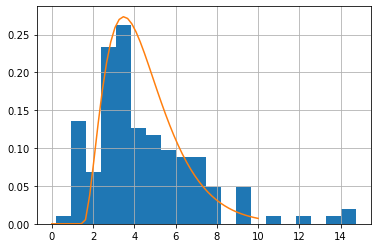

In [23]:
from scipy.stats.distributions import gamma

precip.Jan.hist(density=True, bins=20)
plt.plot(np.linspace(0, 10), gamma.pdf(np.linspace(0, 10), alpha_mom[0], beta_mom[0]))

Looping over all months, we can create a grid of plots for the distribution of rainfall, using the gamma distribution:

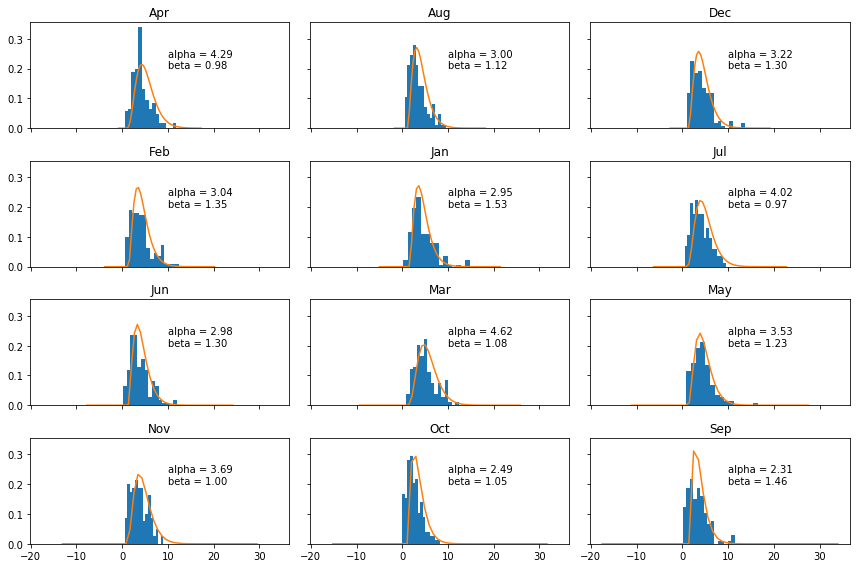

In [25]:
axs = precip.hist(density=True, figsize=(12, 8), sharex=True, sharey=True, bins=15, grid=False)

for ax in axs.ravel():
    
    # Get month
    m = ax.get_title()
    
    # Plot fitted distribution
    x = np.linspace(*ax.get_xlim())
    ax.plot(x, gamma.pdf(x, alpha_mom[m], beta_mom[m]))
    
    # Annotate with parameter estimates
    label = 'alpha = {0:.2f}\nbeta = {1:.2f}'.format(alpha_mom[m], beta_mom[m])
    ax.annotate(label, xy=(10, 0.2))
    
plt.tight_layout()

# Another example

Maximum Likelihood
==================

**Maximum likelihood** (ML) fitting is usually more work than the method of moments, but it is preferred as the resulting estimator is known to have good theoretical properties. 

There is a ton of theory regarding ML. We will restrict ourselves to the mechanics here.

Say we have some data $y = y_1,y_2,\ldots,y_n$ that is distributed according to some distribution:

<div style="font-size: 120%;">  
$$Pr(Y_i=y_i | \theta)$$
</div>

Here, for example, is a **Poisson distribution** that describes the distribution of some discrete variables, typically *counts*: 

Text(0, 0.5, 'Pr(y)')

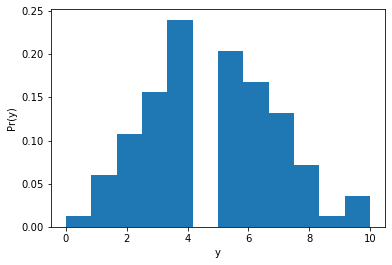

In [27]:
y = np.random.poisson(5, size=100)
plt.hist(y, bins=12, density=True)
plt.xlabel('y'); plt.ylabel('Pr(y)')

The product $\prod_{i=1}^n Pr(y_i | \theta)$ gives us a measure of how **likely** it is to observe values $y_1,\ldots,y_n$ given the parameters $\theta$. Maximum likelihood fitting consists of choosing the appropriate function $l= Pr(Y|\theta)$ to maximize for a given set of observations. We call this function the *likelihood function*, because it is a measure of how likely the observations are if the model is true.

> Given these data, how likely is this model?

In the above model, the data were drawn from a Poisson distribution with parameter $\lambda =5$.

$$L(y|\lambda=5) = \frac{e^{-5} 5^y}{y!}$$

So, for any given value of $y$, we can calculate its likelihood:

In [28]:
poisson_like = lambda x, lam: np.exp(-lam) * (lam**x) / (np.arange(x)+1).prod()

lam = 6
value = 10
poisson_like(value, lam)

0.041303093412337726

In [32]:
np.sum(poisson_like(yi, lam) for yi in y)

/home/lety/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  """Entry point for launching an IPython kernel.


11.621565840958532

In [20]:
lam = 8
np.sum(poisson_like(yi, lam) for yi in y)

7.155434675237137

We can plot the likelihood function for any value of the parameter(s):

Text(0, 0.5, 'L($\\lambda$|x=5)')

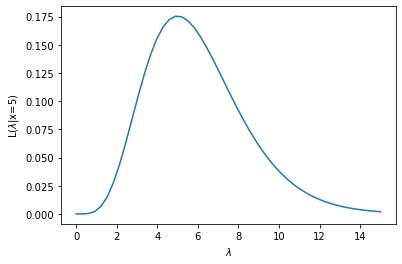

In [33]:
lambdas = np.linspace(0,15)
x = 5
plt.plot(lambdas, [poisson_like(x, l) for l in lambdas])
plt.xlabel('$\lambda$')
plt.ylabel('L($\lambda$|x={0})'.format(x))

How is the likelihood function different than the probability distribution function (PDF)? The likelihood is a function of the parameter(s) *given the data*, whereas the PDF returns the probability of data given a particular parameter value. Here is the PDF of the Poisson for $\lambda=5$.

Text(0, 0.5, 'Pr(X|$\\lambda$=5)')

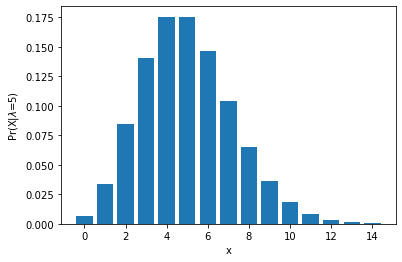

In [34]:
lam = 5
xvals = np.arange(15)
plt.bar(xvals, [poisson_like(x, lam) for x in xvals])
plt.xlabel('x')
plt.ylabel('Pr(X|$\lambda$=5)')

Why are we interested in the likelihood function? 

A reasonable estimate of the true, unknown value for the parameter is one which **maximizes the likelihood function**. So, inference is reduced to an optimization problem.

Module which will help with a lot of implemented formulas:

https://www.statsmodels.org/stable/index.html

More info:
    
https://risk-engineering.org/statistical-modelling/

https://www.datacamp.com/community/tutorials/python-statistics-data-science#regressionanalysis

https://www.datacamp.com/community/tutorials/categorical-data

